In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('database.csv')

In [56]:
df.dropna().head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

In [58]:
df.value_counts('manner_of_death')

manner_of_death
shot                1992
shot and Tasered     150
Name: count, dtype: int64

### ผู้ตายถืออะไรในมือถึงสาเหตุของการวิสามัญ?

<Axes: ylabel='armed'>

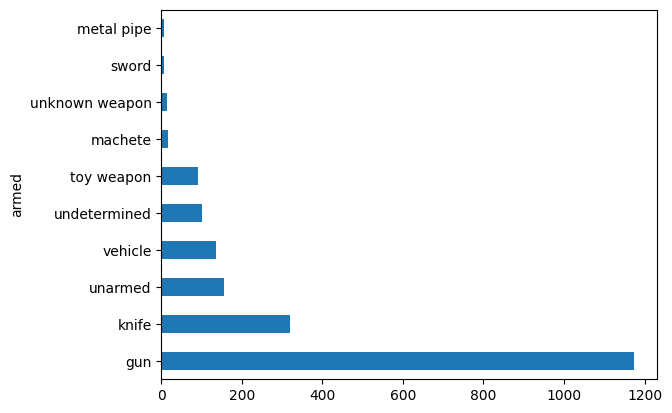

In [59]:
df.value_counts('armed')[:10].plot(kind='barh')

### state ที่ไหนเกิดการวิสามัญเยอะที่สุด

<Axes: ylabel='state'>

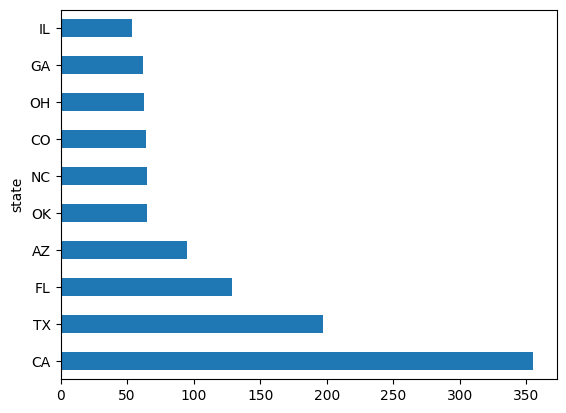

In [60]:
df.value_counts('state')[:10].plot(kind='barh')

<Axes: ylabel='race'>

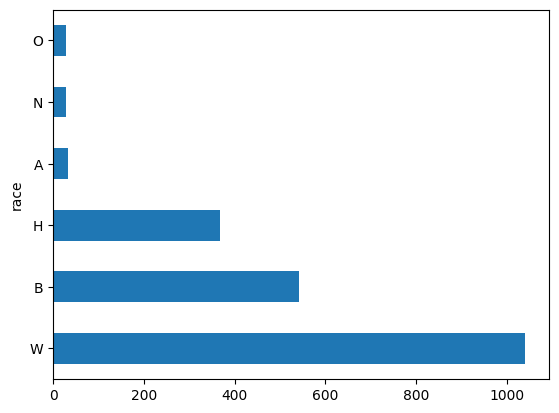

In [61]:
df.value_counts('race')[:10].plot(kind='barh')

<Axes: ylabel='armed'>

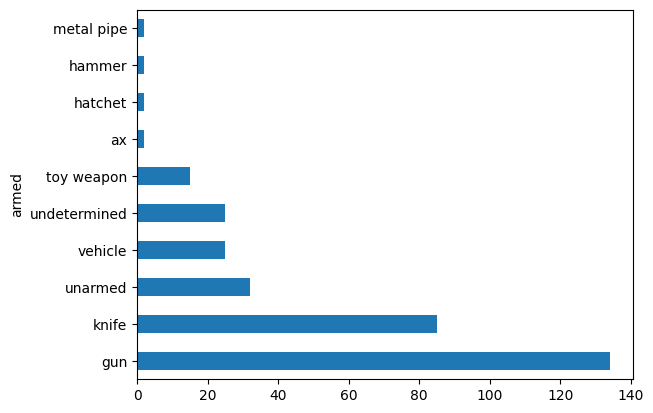

In [62]:
df[df['state'] == 'CA'].value_counts('armed')[:10].plot(kind='barh')

<Axes: ylabel='flee'>

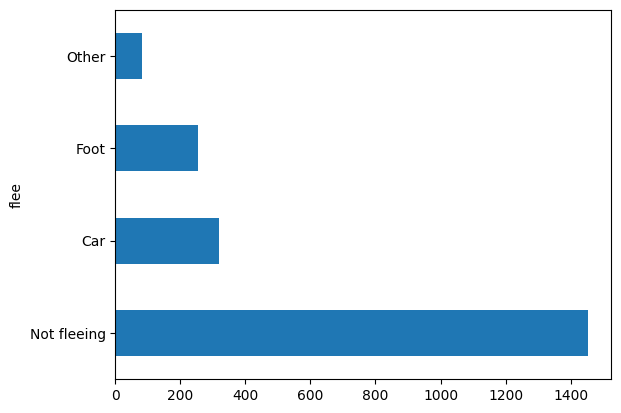

In [63]:
df.value_counts('flee')[:10].plot(kind='barh')

<Axes: ylabel='armed'>

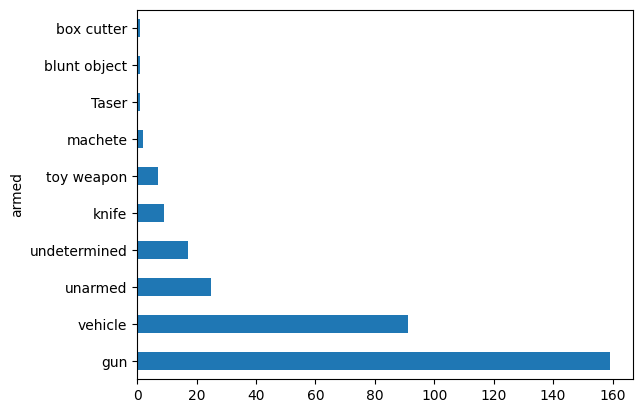

In [64]:
df[df['flee'] == 'Car'].value_counts('armed')[:10].plot(kind='barh')

In [65]:
# df[df['flee'] == 'Not fleeing'].value_counts('armed')[:10].plot(kind='barh')

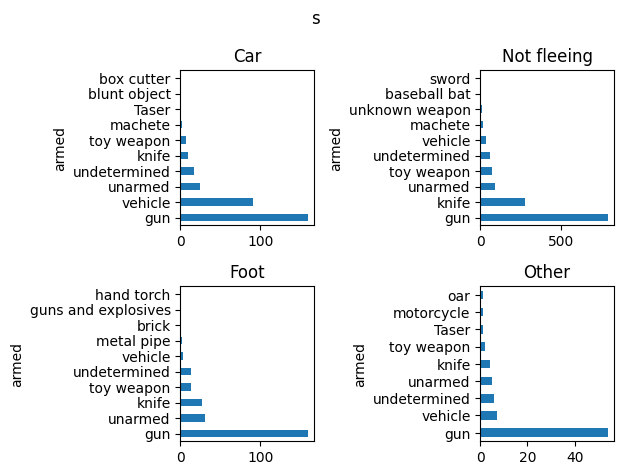

In [66]:
fig, axes = plt.subplots( ncols = 2, nrows = 2 )
df[df['flee'] == 'Car'].value_counts('armed')[:10].plot(kind='barh' , ax=axes[0,0] , title='Car')
df[df['flee'] == 'Not fleeing'].value_counts('armed')[:10].plot(kind='barh' , ax=axes[0,1] , title='Not fleeing')
df[df['flee'] == 'Foot'].value_counts('armed')[:10].plot(kind='barh' , ax=axes[1,0] , title='Foot')
df[df['flee'] == 'Other'].value_counts('armed')[:10].plot(kind='barh' , ax=axes[1,1] , title='Other')
plt.suptitle("s")
fig.tight_layout()

In [67]:
grop = df.groupby(['race','gender']).size()
grop.head()

race  gender
A     F           1
      M          32
B     F          22
      M         520
H     F           4
dtype: int64

<Axes: xlabel='race'>

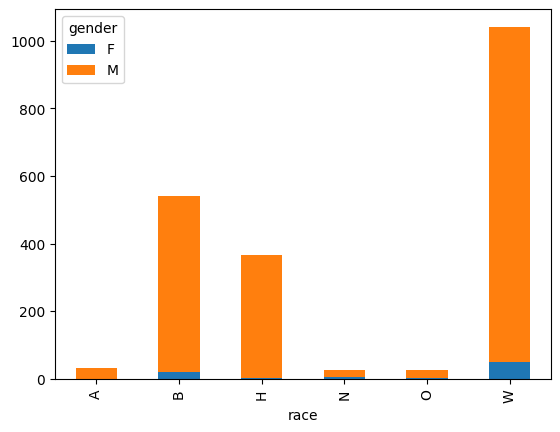

In [68]:
df.groupby(['race','gender']).size().unstack().plot(kind='bar' , stacked= True)

<Axes: xlabel='race'>

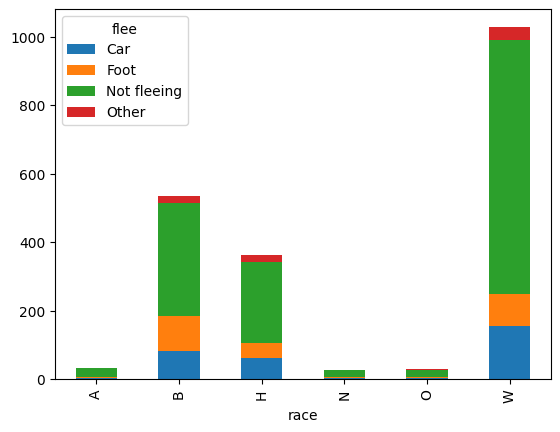

In [69]:
df.groupby(['race','flee']).size().unstack().plot(kind='bar' , stacked= True)

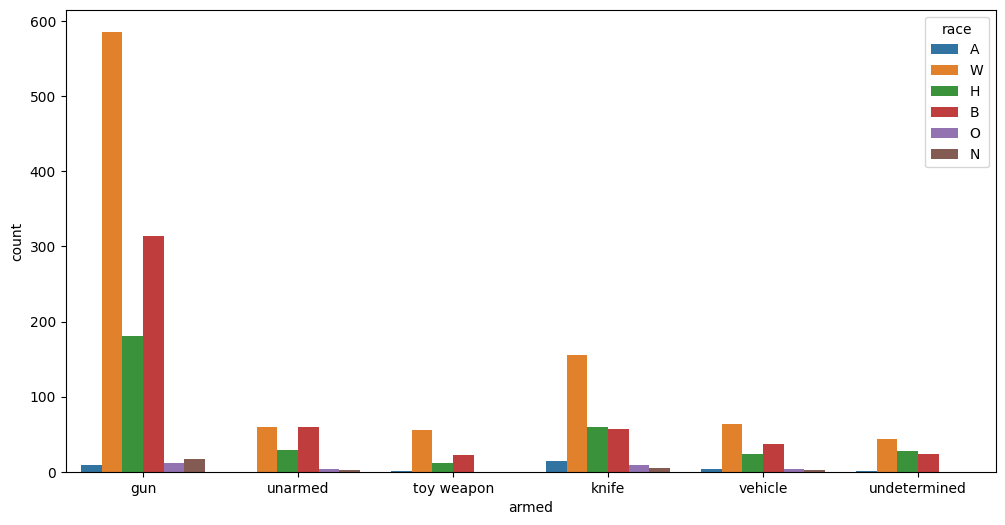

In [70]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='armed', data=df[df['armed'].map(df['armed'].value_counts()) > 30], hue='race')
plt.show()

In [71]:
# df.groupby(['race','flee']).size().plot(kind='bar' , stacked= True)

In [72]:
df[df['age'] == df['age'].min()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
830,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True


In [73]:
df[df['age'] == df['age'].max()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
426,542,Raymond Phillips,2015-06-11,shot,gun,86.0,M,NaN,Columbia,TN,True,attack,Not fleeing,False
1675,1880,Eugene Craig,2016-09-12,shot,gun,86.0,M,NaN,Saratoga,CA,False,other,Not fleeing,False


In [74]:
df2 = df.value_counts('date').reset_index()
df2.columns = ['date', 'counts']
df2
datemax = df2[df2['counts']==df.value_counts('date').max()]
datemax

,date,counts
0,2016-12-21,8
1,2017-02-03,8
2,2015-07-07,8
3,2017-01-24,8
4,2015-12-14,8
5,2017-02-10,8
6,2016-01-27,8


In [75]:
datemax['date']

0    2016-12-21
1    2017-02-03
2    2015-07-07
3    2017-01-24
4    2015-12-14
5    2017-02-10
6    2016-01-27
Name: date, dtype: object

In [76]:
def maxDay(days):
    for day in datemax['date'] :
        if day == days :
            return True
    return False

In [77]:
df['date'].apply(maxDay)

0       False
1       False
2       False
3       False
4       False
        ...  
2137    False
2138    False
2139    False
2140    False
2141    False
Name: date, Length: 2142, dtype: bool

In [78]:
s = df.groupby('race')['flee'].value_counts()
s

race  flee       
A     Not fleeing     27
      Car              3
      Foot             3
B     Not fleeing    329
      Foot           103
      Car             82
      Other           20
H     Not fleeing    238
      Car             62
      Foot            43
      Other           18
N     Not fleeing     19
      Foot             5
      Car              2
O     Not fleeing     21
      Car              4
      Foot             2
      Other            1
W     Not fleeing    743
      Car            155
      Foot            92
      Other           39
Name: count, dtype: int64

In [79]:
x = s.index
x[3][0]

'B'

In [80]:
# arr_df = {}
# for i in range(0, df['Category'].nunique()):
  

  
# x = arr_df['Furniture'].index
# y_Furniture = arr_df['Furniture']
# y_Office = arr_df['Office Supplies']
# y_Tech = arr_df['Technology']

# # Plot each bar plot separately
# plt.bar(x - 0.2, y_Furniture, width=0.2, label='Furniture', color='#66b3ff', align='center',hatch = '//')
# plt.bar(x, y_Office, width=0.2, label='Office Supplies', color='#99ff99', align='center',hatch = '//')
# plt.bar(x + 0.2, y_Tech, width=0.2, label='Technology', color='#ff9999', align='center',hatch = '//')

# plt.yticks(np.arange(10000, 60000, 10000))
# plt.xticks([2014, 2015, 2016, 2017])
# plt.legend(loc='best')
# plt.show()

In [81]:
# a = s.index
# b = s

# plt.bar(a, b, color = 'r',alpha=0.5,hatch = '\/-|',lw=3 ,ec='k')
# plt.xticks(a)
# plt.show()

In [82]:
df[df['date'].apply(maxDay)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
488,608,Marcellus Jamarcus Burley,2015-07-07,shot,gun,18.0,M,B,Houston,TX,False,attack,Not fleeing,False
489,609,Adam Dujanovic,2015-07-07,shot,metal pole,33.0,M,W,Mesa,AZ,False,other,Not fleeing,False
490,611,Joe Cody,2015-07-07,shot,gun,59.0,M,W,Dallas,TX,False,attack,Not fleeing,False
491,614,Daniel Hernandez,2015-07-07,shot,gun,47.0,M,H,Bakersfield,CA,False,attack,Not fleeing,False
492,615,Jose Graciano Lopez,2015-07-07,shot,gun,39.0,M,H,Edinburg,TX,True,attack,Not fleeing,False
493,616,Tremaine Dantzler,2015-07-07,shot,knife,37.0,M,B,Atlantic City,NJ,False,attack,Foot,False
494,617,Nicholas Booth,2015-07-07,shot,gun,35.0,M,W,Sugar Creek,MO,False,attack,Car,False
495,618,Joshua Blough,2015-07-07,shot,knife,28.0,M,W,Elizabethtown,KY,False,other,Not fleeing,False
941,1085,Calvin McKinnis,2015-12-14,shot,gun,33.0,M,B,New Orleans,LA,False,attack,Not fleeing,True
942,1088,Jeffrey Gene Evans,2015-12-14,shot and Tasered,knife,52.0,M,W,Middle River,MD,True,other,Not fleeing,False


In [83]:
df_race = df.value_counts('race').reset_index()
df_race.columns = ['race', 'counts']
df_race

,race,counts
0,W,1041
1,B,542
2,H,367
3,A,33
4,N,28
5,O,28


In [84]:
df_race['race'][1]

'B'

In [85]:
def SRace(Races,i):
    if Races == df_race['race'][i]  :
        return True
    return False

In [86]:
def SRace2(Races,i):
    for Race in Races:
        if Race == df_race['race'][i] :
            return True
    return False

In [87]:
# df['race'].apply(SRace)

In [88]:
# sns.swarmplot(data =df, x = 'flee', y = df['race'], hue='race')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

In [90]:
df[['age']  ]

,age
0,53.0
1,47.0
2,23.0
3,32.0
4,39.0
...,...
2137,66.0
2138,27.0
2139,40.0
2140,25.0


In [91]:
df2 = df.value_counts('date').reset_index()
df2.columns = ['date', 'counts']
df2
datemax = df2[df2['counts']==df.value_counts('date').max()]
datemax

,date,counts
0,2016-12-21,8
1,2017-02-03,8
2,2015-07-07,8
3,2017-01-24,8
4,2015-12-14,8
5,2017-02-10,8
6,2016-01-27,8


In [92]:
age = df.value_counts('age').reset_index()
age.columns = ['age', 'counts']
age

,age,counts
0,25.0,85
1,31.0,82
2,36.0,79
3,29.0,75
4,26.0,65
...,...,...
66,14.0,1
67,80.0,1
68,82.0,1
69,13.0,1


In [93]:
from sklearn.linear_model import LinearRegression
att = age[['age']]
label = age['counts']

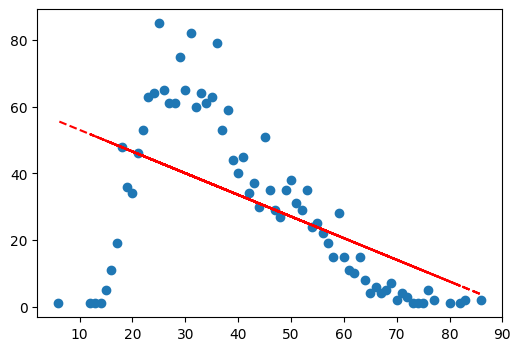

In [94]:


model = LinearRegression()
model.fit(att, label)
# att_new = model.transform(att)


ans = model.predict(att)
plt.figure(figsize=[6,4])
plt.scatter(age['age'],age['counts'])
plt.plot(att,ans,'r--')

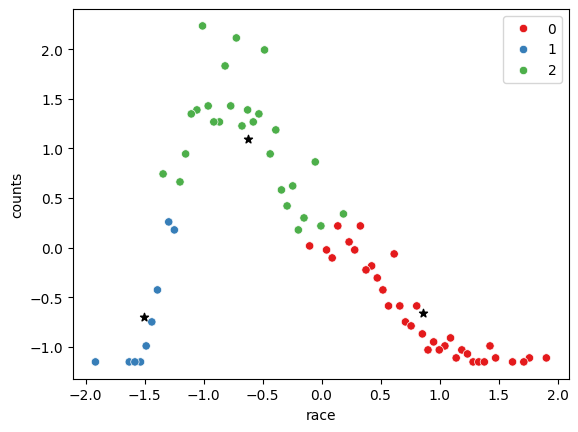

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

race = df.value_counts('age').reset_index()
race.columns = ['race', 'counts']

df2 = race[['race','counts']].dropna()

scaler.fit(df2)
df2[['race','counts']] = scaler.transform(df2)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=0)
model.fit(df2)

sns.scatterplot(data = df2, x = 'race', y = 'counts', hue=model.labels_, palette='Set1')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color= 'k', marker='*')

In [96]:
age = df.value_counts('armed').reset_index()
age.columns = ['armed', 'counts']
age

,armed,counts
0,gun,1173
1,knife,319
2,unarmed,155
3,vehicle,136
4,undetermined,101
...,...,...
59,metal hand tool,1
60,metal object,1
61,motorcycle,1
62,nail gun,1


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [98]:
race = df.value_counts('armed').reset_index()
race.columns = ['armed', 'counts']
race

,armed,counts
0,gun,1173
1,knife,319
2,unarmed,155
3,vehicle,136
4,undetermined,101
...,...,...
59,metal hand tool,1
60,metal object,1
61,motorcycle,1
62,nail gun,1


In [99]:
df2 = race[['armed','counts']].dropna()

In [100]:

# scaler.fit(df2)
# df2[['armed','counts']] = scaler.transform(df2)

# from sklearn.cluster import KMeans
# model = KMeans(n_clusters=3,random_state=0)
# model.fit(df2)

# sns.scatterplot(data = df2, x = 'armed', y = 'counts', hue=model.labels_, palette='Set1')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color= 'k', marker='*') 

In [101]:
# age = df.value_counts('armed').reset_index()
# age.columns = ['armed', 'counts']
# age

In [102]:
# att = age[['armed']]
# label = age['counts']

In [103]:
# ans = model.predict(att)
# plt.figure(figsize=[6,4])
# plt.scatter(age['armed'],age['counts'])
# plt.plot(att,ans,'r--')

In [104]:
# ans

In [105]:
# # จุดตัดแกน
# a = model.intercept_

# # 
# b = model.coef_

In [106]:
score = model.score(att , label)
score

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- age
Feature names seen at fit time, yet now missing:
- counts
- race


In [ ]:
err = 1 - score
err

0.9996763743260195

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


pf = PolynomialFeatures(degree=2)
pf.fit(att)
att_new = pf.transform(att)

model = LinearRegression()
model.fit(att_new, label)

LinearRegression()

---

In [ ]:
ans = model.predict(att_new)
plt.figure(figsize=[6,4])

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

0.5496579371850521

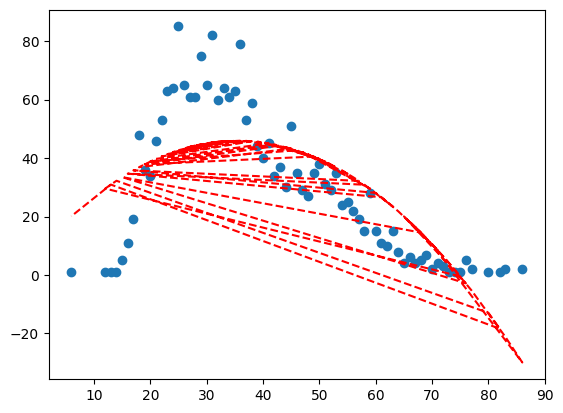

In [ ]:
plt.scatter(age['age'],age['counts'])
plt.plot(att['age'],ans,'r--')

model.score(att_new,label)
